In [1]:
import sys
sys.path.append("/mnt/d/00_SARDARCHITECTLABS/projects/fscoreai-ml/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## One-Dimensional Data

In [2]:
from fscoreai.utils import utils

In [3]:
X, y = utils.get_data(name='simulate_linear_data')
print(X.shape, y.shape)

(100, 1) (100,)


## Using sklearn for testing

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model_sklearn = LinearRegression(fit_intercept=True)
model_sklearn.fit(X,y)
print(model_sklearn.coef_, model_sklearn.intercept_)

[2.06896634] 0.9135935729613112


## Simple Linear Regression Model

In [6]:
class SimpleLinearRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    
    def fit_stat(self, X, y):
        # Closed-form Solution
            X_mean = np.mean(X, axis=0)
            y_mean = np.mean(y)
            self.coef_ = np.sum((X - X_mean).T*(y-y_mean), axis=1)/(np.sum((X - X_mean)**2, axis=0)) 
            self.intercept_ = y_mean - (self.coef_ * X_mean)
            return self
    
    def fit_grad(self, X, y, lr=1e-8, epochs=50):
        # Batch Gradient Descent Solution
            self.lr = lr  #   Learning rate
            self.epochs = epochs
            self.n, self.d = X.shape
            
            for epoch in range(self.epochs):
                for j in range(self.d):
                    y_pred = self.predict(X)
                    d_coef = - (2 / self.n) * np.sum((y - y_pred).dot(X[:,j])) #Derivative w.r.t. self.coef_
                    d_intercept = - (2 / self.n) * np.sum(y - y_pred) #Derivative w.r.t. self.intercept_
                    self.coef_ -=  self.lr * d_coef          #    Update self.coef_ 
                    self.intercept_ -=  self.lr * d_intercept  #    Update self.intercept_
            return self

In [7]:
model_fscore_1 = SimpleLinearRegression()
model_fscore_1.fit_stat(X,y)
print(model_fscore_1.coef_, model_fscore_1.intercept_)

[2.06896634] [0.91359357]


In [8]:
model_fscore_2 = SimpleLinearRegression()
model_fscore_2.fit_grad(X,y,lr=1e-6, epochs=50000)
print(model_fscore_2.coef_, model_fscore_2.intercept_)

2.214546965177562 0.9111545363313955


## Plotting the models

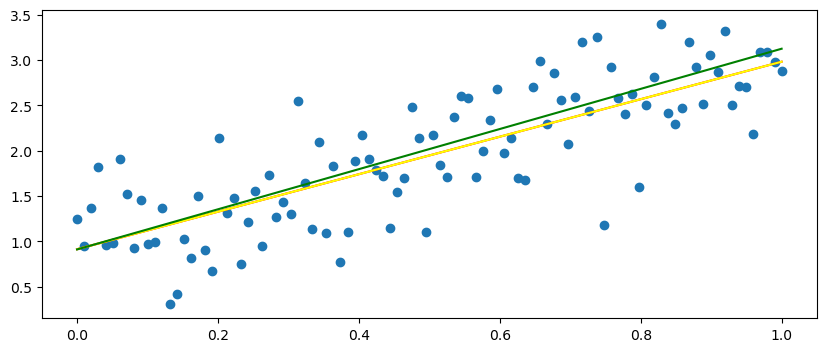

In [9]:
preds_sklearn = model_sklearn.predict(X)
preds_fscore_1 = model_fscore_1.predict(X)
preds_fscore_2 = model_fscore_2.predict(X)

plt.figure(figsize=(10,4))
plt.scatter(X, y)
plt.plot(X, preds_sklearn, color='red')
plt.plot(X, preds_fscore_1, color='yellow')
plt.plot(X, preds_fscore_2, color='green')

## Multi-Dimensional Data

In [10]:
X, y = utils.get_data(name='kc_house_data')
print(X.shape, y.shape)

(21613, 2) (21613,)


In [11]:
model_sklearn = LinearRegression(fit_intercept=True)
model_sklearn.fit(X,y)
print(model_sklearn.coef_, model_sklearn.intercept_)

[   313.94868588 -57066.75892292] 79469.35907477367


In [12]:
class MultiLinearRegression():
    def __init__(self):
        self.coef_ = 0
        self.intercept_ = 0
    
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    
    def fit_stat(self, X, y):
        # Closed-form Solution
            self.n, self.d = X.shape
            
            x_0 = np.ones((X.shape[0], 1))
            X = np.hstack((x_0, X))
            betas = np.linalg.inv(np.dot(X.T, X)).dot(np.dot(X.T, y))
            self.intercept_ = betas[0]
            self.coef_ = betas[1:]

            return self
    
    def fit_grad(self, X, y, lr=1e-8, epochs=50):
        # Batch Gradient Descent Solution
            self.lr = lr  #   Learning rate
            self.epochs = epochs
            self.n, self.d = X.shape
            
            x_0 = np.ones((X.shape[0], 1))
            X = np.hstack((x_0, X))
            betas = np.zeros(X.shape[1])
            
            for _ in range(self.epochs):
                y_pred = np.dot(X, betas)
                d_betas = np.dot(X.T, (y_pred - y))
                betas = betas.T + lr * d_betas
                
            self.intercept_ = betas[0]
            self.coef_ = betas[1:]
            return self

In [13]:
model_fscore_1 = MultiLinearRegression()
model_fscore_1.fit_stat(X,y)
print(model_fscore_1.coef_, model_fscore_1.intercept_)

[   313.94868588 -57066.75892292] 79469.35907477234


In [14]:
model_fscore_2 = MultiLinearRegression()
model_fscore_2.fit_grad(X,y,lr=1e-12, epochs=1000)
print(model_fscore_2.coef_, model_fscore_2.intercept_)

[-2.62248597e+48 -3.80658468e+45] -1.0551374531406719e+45


## Loss Functions

In [15]:
def loss(x_1, x_2):
    return (np.mean(x_2 - x_1)**2)

## Plotting the models

X: (100, 2) y: (100, 1) Betas: (2, 1)


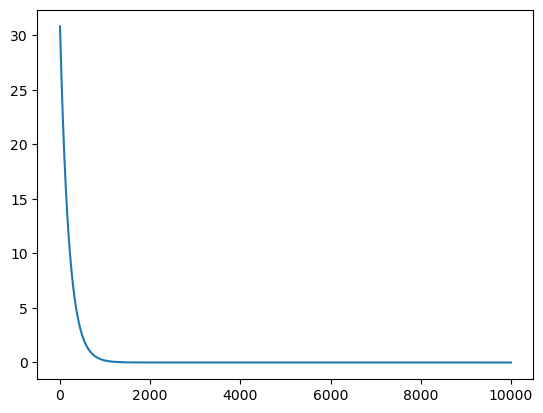

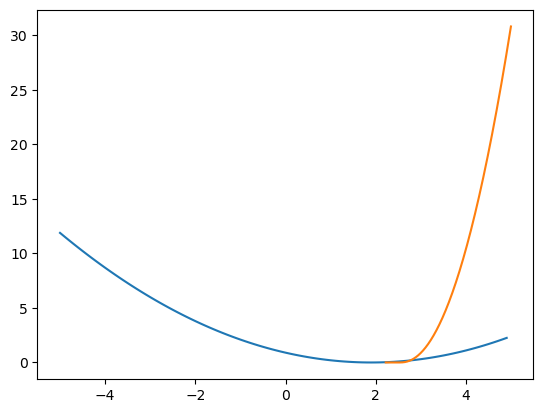

In [124]:
X, y = utils.get_data(name='simulate_linear_data')

def train(X, y, lr, epochs):
    loss_dict = {}
    n, d = X.shape
    x_0 = np.ones((X.shape[0], 1))
    X = np.hstack((x_0, X))
    y = y.reshape(-1, 1)
    betas = np.ones((X.shape[1], 1))*5
    
    print("X:", X.shape, "y:", y.shape, "Betas:", betas.shape)

    for epoch in range(epochs):
        y_pred = np.dot(X, betas)
        d_betas = - 2/n * np.dot(X.T, (y - y_pred))
        betas -= lr * d_betas
        
        cost = loss(y, y_pred)
        intercept = float(betas[1])
        loss_dict[epoch] = [intercept, cost]
        
    return loss_dict

loss_dict = train(X, y, 1e-3, 10000)
loss_dict_values = np.array(list(loss_dict.values()))

x_0 = np.ones((X.shape[0], 1))
X = np.hstack((x_0, X))
intercept_list = np.arange(-5,5, 0.1)
history = {}
for intercept in intercept_list:
    betas = np.array([1, intercept])
    y_pred = np.dot(X, betas).reshape(-1,1)
    cost = loss(y, y_pred)
    history[intercept] = cost

plt.plot(loss_dict.keys(), loss_dict_values[:, 1])
plt.show()
plt.plot(history.keys(), history.values())
plt.plot(loss_dict_values[:, 0], loss_dict_values[:, 1])
plt.show()